In [7]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D
from density import grid

Populating the interactive namespace from numpy and matplotlib


In [27]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [5]:
#Function that reads the N-body sumulation orbit
def Nbody_orbit(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    time = data[:,0]
    Rgal = data[:,1]
    x_sat= data[:,2]
    y_sat = data[:,3]
    z_sat = data[:,4]
    x_gal = data[:,5]
    y_gal = data[:,6]
    z_gal = data[:,7]
    Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,12]
    vy_gal = data[:,13]
    vz_gal = data[:,14]
    return time, Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal


In [43]:
tNB, RgalNB, xsatNB, ysatNB, zsatNB, xgalNB, ygalNB, zgalNB, vgalNB, vxsatNB, vysatNB, vzsatNB, vxgalNB, vygalNB, vzgalNB\
= Nbody_orbit('LMC6_H1.txt')

In [52]:
def Nbody_snaps(snap, Nhost):
    path = '../../data/LMCMW/MWmLMC6/H1/'
    positions = readsnap(path + snap,'pos', 'dm')
    particles_ids = readsnap(path + snap, 'pid', 'dm')
    ID = np.sort(particles_ids)
    # The first set of particles are from the host DM halo, the
    # second set are from the satellite DM halo, the limit is know by
    # the number of particles in the host halo.
    idcut = ID[Nhost-1]
    index_mw = np.where(particles_ids<=idcut)[0]
    index_LMC = np.where(particles_ids>idcut)[0]
    x_mw = positions[index_mw,0]
    y_mw = positions[index_mw,1]
    z_mw = positions[index_mw,2]
    x_lmc = positions[index_LMC,0]
    y_lmc = positions[index_LMC,1]
    z_lmc = positions[index_LMC,2]
    # cuts 
    index1 = np.where(np.sqrt(x_mw**2+y_mw**2+z_mw**2)<500)[0]
    index2 = np.where(np.sqrt(x_lmc**2+y_lmc**2+z_lmc**2)<500)[0]
    index3 = np.where(np.sqrt(positions[:, 0]**2.0+positions[:, 1]**2.0+positions[:, 2]**2.0)<400)[0]
    return positions[index3, 0], positions[index3, 1], positions[index3, 2]
    #return x_mw[index1], y_mw[index1], z_mw[index1], x_lmc[index2], y_lmc[index2], z_lmc[index2]




In [53]:
#xMW, yMW, zMW, xLMC, yLMC, zLMC = Nbody_snaps('MWfLMC6H1_119.hdf5', 1000000)
X, Y, Z = Nbody_snaps('MWfLMC6H1_119.hdf5', 1000000)

Returning DM    Positions
Returning DM    Particle IDs


824532
446675


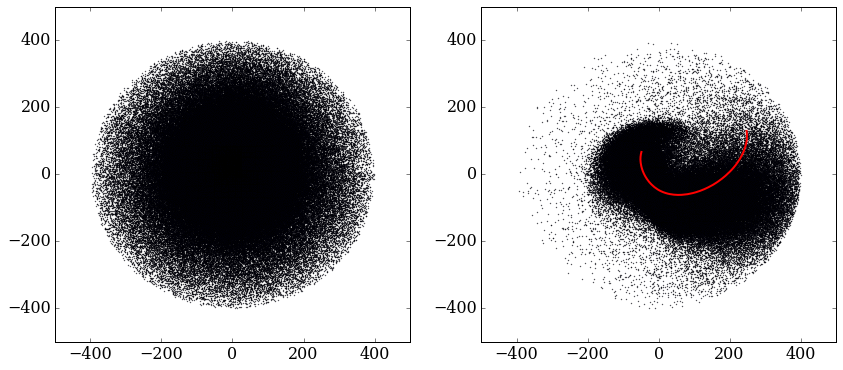

In [45]:
figure(figsize=(14, 6))
subplot(1, 2, 1)
scatter(xMW, yMW, s=0.1)
subplot(1, 2, 2)
plot(ysatNB, zsatNB, lw=2, c='r')
scatter(yLMC, zLMC, s=0.1)
print len(xMW)
print len(yLMC)


In [ ]:
zMW_proy = np.zeros(len(xMW))
rho_mw = grid(X, Y, Z, 100)

In [ ]:
figure(figsize=(8,6))
imshow(np.log10(rho_mw), origin='lower', extent=[min(X), max(X), 
                                                 min(X), max(Y)], cmap='terrain')
colorbar()
xlim(-300, 300)
ylim(-300, 300)